In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt
import seaborn as sns
project_dir = "../data/"

In [17]:
games = pd.read_csv(f'{project_dir}games.csv')
play_df = pd.read_csv(f'{project_dir}plays.csv')
player_plays = pd.read_csv(f'{project_dir}player_play.csv')
players = pd.read_csv(f'{project_dir}players.csv')
tracking_df = pd.read_csv(f'{project_dir}tracking_week_1.csv')

In [18]:
tracking_df = tracking_df.loc[(tracking_df['gameId'] == 2022091200) & (tracking_df['playId'] == 64)]
tracking_df.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


Now need to join with players to get postions

In [19]:
tracking_df = pd.merge(tracking_df, players[['nflId', 'position']], on='nflId')
tracking_df.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense,SS
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN,SS
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN,SS
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN,SS
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN,SS


In [20]:
temp = tracking_df.loc[tracking_df['frameId'] == 30]
temp

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position
29,2022091200,64,35459.0,Kareem Jackson,30,BEFORE_SNAP,2022-09-13 00:16:06.4,22.0,DEN,right,52.19,28.94,0.05,0.56,0.01,231.72,96.90,NaN,SS
192,2022091200,64,39987.0,Geno Smith,30,BEFORE_SNAP,2022-09-13 00:16:06.4,7.0,SEA,right,34.97,23.87,0.67,0.38,0.07,86.94,67.88,NaN,QB
355,2022091200,64,41310.0,Gabe Jackson,30,BEFORE_SNAP,2022-09-13 00:16:06.4,66.0,SEA,right,38.60,22.37,0.29,0.78,0.03,85.70,81.48,NaN,G
518,2022091200,64,42393.0,Ronald Darby,30,BEFORE_SNAP,2022-09-13 00:16:06.4,23.0,DEN,right,45.05,15.36,1.64,1.25,0.17,278.52,171.25,NaN,CB
681,2022091200,64,42403.0,Randy Gregory,30,BEFORE_SNAP,2022-09-13 00:16:06.4,5.0,DEN,right,41.01,18.80,0.39,0.30,0.04,254.59,260.32,NaN,OLB
844,2022091200,64,42412.0,Tyler Lockett,30,BEFORE_SNAP,2022-09-13 00:16:06.4,16.0,SEA,right,37.84,15.30,2.05,1.67,0.21,108.36,119.78,NaN,WR
1007,2022091200,64,42826.0,DeShawn Williams,30,BEFORE_SNAP,2022-09-13 00:16:06.4,99.0,DEN,right,41.10,22.45,0.75,0.10,0.08,254.90,224.98,NaN,DE
1170,2022091200,64,42929.0,Alex Singleton,30,BEFORE_SNAP,2022-09-13 00:16:06.4,49.0,DEN,right,44.64,24.99,0.92,0.27,0.09,267.51,40.18,NaN,ILB
1333,2022091200,64,43387.0,Justin Simmons,30,BEFORE_SNAP,2022-09-13 00:16:06.4,31.0,DEN,right,50.91,17.58,0.60,0.28,0.06,351.23,9.91,NaN,FS
1496,2022091200,64,43537.0,Austin Blythe,30,BEFORE_SNAP,2022-09-13 00:16:06.4,63.0,SEA,right,39.19,24.17,0.07,0.34,0.01,50.66,262.07,NaN,C


Adding all players to graph to test idea

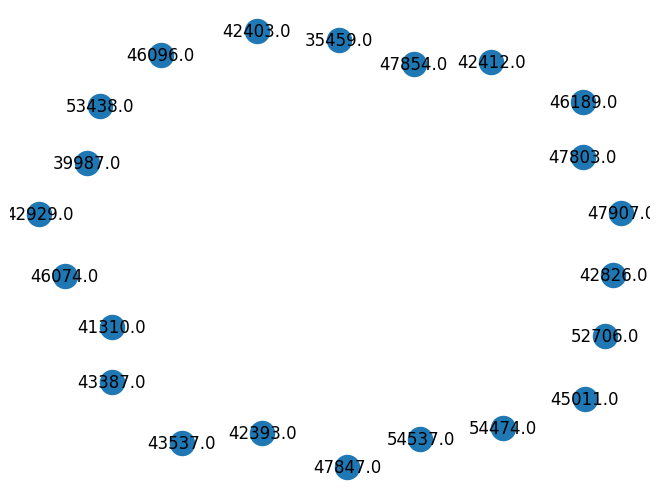

In [21]:
G = nx.Graph()

for _, row in temp.iterrows():
    G.add_node(row['nflId'], position=row['position'], club=row['club'], x=row['x'], y=row['y'], s=row['s'], a=row['a'], dir=row['dir'])

nx.draw(G, with_labels=True)

Now need to add edges

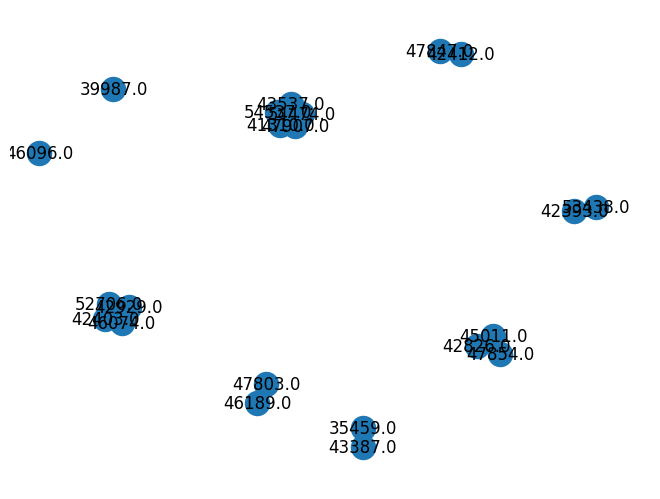

In [22]:
# Position groups
position_groups = {
    'o_line': ['OT', 'G', 'C', 'T'],
    'tight_end': ['TE'],
    'receiver': ['WR'],
    'running_back': ['RB', 'FB'],
    'quarterback': ['QB'],
    'd_line': ['DE', 'DT', 'NT'],
    'linebacker': ['OLB', 'ILB', 'LB', 'MLB'],
    'cornerback': ['CB'],
    'safety': ['FS', 'SS'],
}

# Now add edges connecting players in the same position group
for position_group in position_groups:
    players = [nflId for nflId, data in G.nodes(data=True) if data['position'] in position_groups[position_group]]
    for i in range(len(players)):
        for j in range(i+1, len(players)):
            G.add_edge(players[i], players[j], type='position_group')

nx.draw(G, with_labels=True)

In [23]:
# print all edges and their types
for edge in G.edges(data=True):
    print(edge)

(35459.0, 43387.0, {'type': 'position_group'})
(41310.0, 43537.0, {'type': 'position_group'})
(41310.0, 47907.0, {'type': 'position_group'})
(41310.0, 54474.0, {'type': 'position_group'})
(41310.0, 54537.0, {'type': 'position_group'})
(42393.0, 53438.0, {'type': 'position_group'})
(42403.0, 42929.0, {'type': 'position_group'})
(42403.0, 46074.0, {'type': 'position_group'})
(42403.0, 52706.0, {'type': 'position_group'})
(42412.0, 47847.0, {'type': 'position_group'})
(42826.0, 45011.0, {'type': 'position_group'})
(42826.0, 47854.0, {'type': 'position_group'})
(42929.0, 46074.0, {'type': 'position_group'})
(42929.0, 52706.0, {'type': 'position_group'})
(43537.0, 47907.0, {'type': 'position_group'})
(43537.0, 54474.0, {'type': 'position_group'})
(43537.0, 54537.0, {'type': 'position_group'})
(45011.0, 47854.0, {'type': 'position_group'})
(46074.0, 52706.0, {'type': 'position_group'})
(46189.0, 47803.0, {'type': 'position_group'})
(47907.0, 54474.0, {'type': 'position_group'})
(47907.0, 545

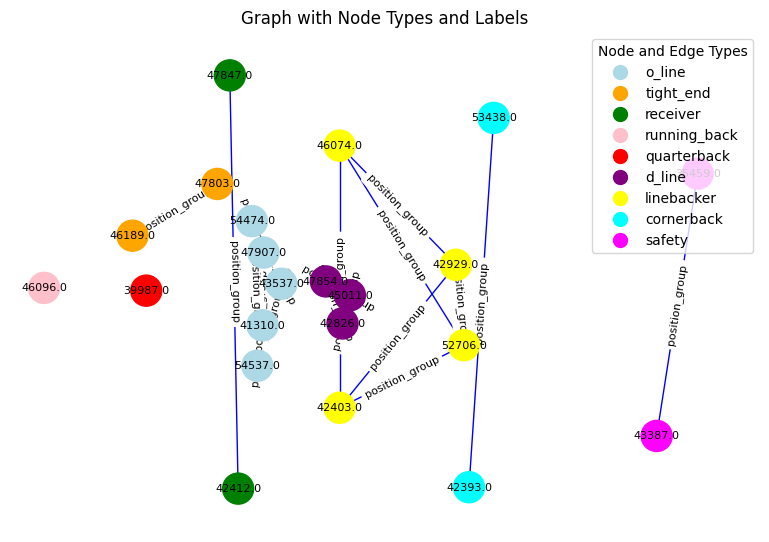

In [24]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import networkx as nx

position_colors = {
    'o_line': 'lightblue',
    'tight_end': 'orange',
    'receiver': 'green',
    'running_back': 'pink',
    'quarterback': 'red',
    'd_line': 'purple',
    'linebacker': 'yellow',
    'cornerback': 'cyan',
    'safety': 'magenta',
}
temp = G.copy()
# Define positions (assumes 'x' and 'y' attributes are present)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Assign colors to nodes based on position group
node_colors = []
for node, data in G.nodes(data=True):
    for group, positions in position_groups.items():
        if data['position'] in positions:
            node_colors.append(position_colors[group])
            break

# Draw the graph with colored edges
plt.figure(figsize=(7.5, 5))
nx.draw(
    G,
    pos=node_positions,
    with_labels=True,
    node_color=node_colors,
    edge_color='blue',
    node_size=500,
    font_size=8
)

# Add edge labels
edge_labels = {(u, v): data['type'] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos=node_positions, edge_labels=edge_labels, font_color='black', font_size=8
)

# Add a legend for node colors
node_handles = [
    mlines.Line2D([], [], color=color, marker='o', markersize=10, label=group, linestyle='None')
    for group, color in position_colors.items()
]
plt.legend(handles=node_handles, loc='upper right', title="Node and Edge Types")

plt.title("Graph with Node Types and Labels")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()
G = temp

In [25]:
gid = 2022091200
pid = 64

import animate

In [26]:
animate.animate_play(games, tracking_df, play_df, players, gid, pid)

As shown by the animation and the graph, our graph shows all position groups and links them

Now, we want to add the edges for cornerbacks covering WRs

In [27]:
CBs = [nflId for nflId, data in G.nodes(data=True) if data['position'] in position_groups['cornerback']]

WRs = [nflId for nflId, data in G.nodes(data=True) if data['position'] in position_groups['receiver']]

# Calculate the distance between each cornerback and wide receiver
# Find the minimum distance between each cornerback and wide receiver and store their IDs
closest_pairs = []
for CB in CBs:
    min_dist = float('inf')
    closest_WR = None
    for WR in WRs:
        dist = np.linalg.norm(np.array([G.nodes[CB]['x'], G.nodes[CB]['y']]) - np.array([G.nodes[WR]['x'], G.nodes[WR]['y']]))
        if dist < min_dist:
            min_dist = dist
            closest_WR = WR
    print(min_dist)
    closest_pairs.append((CB, closest_WR, min_dist))


for CB, WR, dist in closest_pairs:
    G.add_edge(CB, WR, type='coverage', distance=dist)

7.210249648937262
8.442937877303137


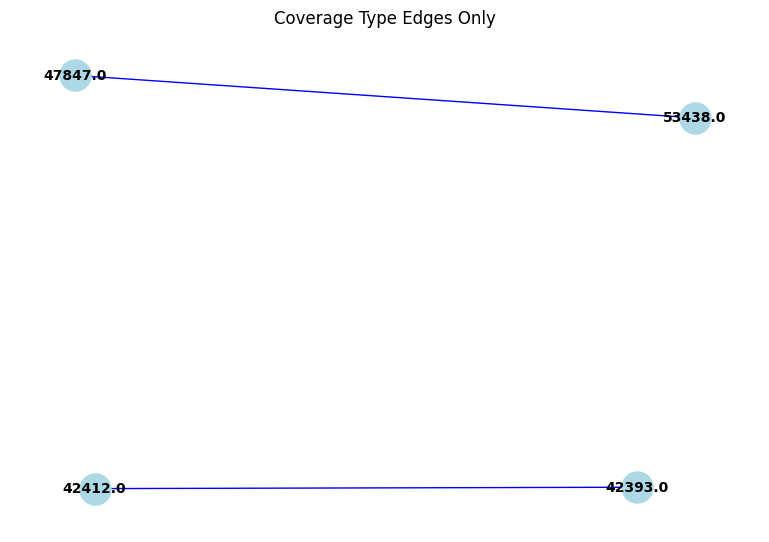

In [28]:
# Example Graph G with 'x', 'y' position attributes for nodes
# You can replace this with your graph, assuming each player has 'x' and 'y' coordinates
# If you have a DataFrame with player data, add 'x' and 'y' positions for each player in the graph nodes

# Assuming G already has nodes with 'x' and 'y' positions
# Filter edges where 'type' == 'coverage'
coverage_edges = [
    (u, v) for u, v, data in G.edges(data=True) if data.get('type') == 'coverage'
]

# Create a subgraph with only the 'coverage' edges
coverage_subgraph = G.edge_subgraph(coverage_edges).copy()

# Extract positions (assuming you have 'x' and 'y' attributes for each player node)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Draw the graph
plt.figure(figsize=(7.5, 5))

# Draw only the nodes and coverage edges
nx.draw(
    coverage_subgraph,
    pos=node_positions,
    with_labels=True,
    node_color='lightblue',  # Optional: Customize node color
    edge_color='blue',       # Coverage edges are shown in blue
    font_size=10,
    node_size=500,
    font_weight='bold'
)

# Add edge labels if needed (e.g., label 'coverage' edges)
# edge_labels = nx.get_edge_attributes(coverage_subgraph, 'type')
# nx.draw_networkx_edge_labels(coverage_subgraph, pos=node_positions, edge_labels=edge_labels)

# Title and grid for better readability
plt.title("Coverage Type Edges Only")
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


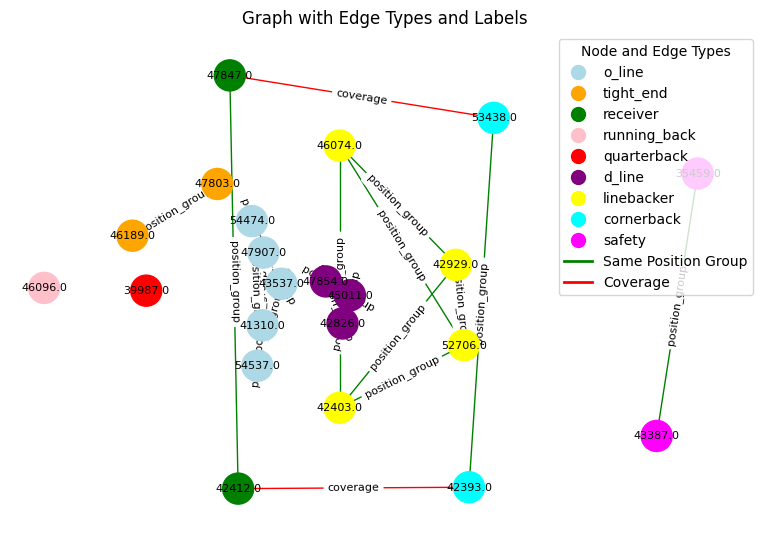

In [31]:
temp = G.copy()
edge_colors = []
for u, v, data in G.edges(data=True):
    if data['type'] == 'coverage':
        edge_colors.append('red')
    else:
        edge_colors.append('green')  # Different position group edges

# Define positions (assumes 'x' and 'y' attributes are present)
node_positions = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Assign colors to nodes based on position group
node_colors = []
for node, data in G.nodes(data=True):
    for group, positions in position_groups.items():
        if data['position'] in positions:
            node_colors.append(position_colors[group])
            break

# Draw the graph with colored edges
plt.figure(figsize=(7.5, 5))
nx.draw(
    G,
    pos=node_positions,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=500,
    font_size=8
)

# Add edge labels
edge_labels = {(u, v): data['type'] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(
    G, pos=node_positions, edge_labels=edge_labels, font_color='black', font_size=8
)

# Add a legend for edge colors
edge_handles = [
    mlines.Line2D([], [], color='green', label='Same Position Group', linewidth=2),
    mlines.Line2D([], [], color='red', label='Coverage', linewidth=2),
]
plt.legend(handles=edge_handles, loc='upper left', title="Edge Types")

# Add a legend for node colors
node_handles = [
    mlines.Line2D([], [], color=color, marker='o', markersize=10, label=group, linestyle='None')
    for group, color in position_colors.items()
]
plt.legend(handles=node_handles + edge_handles, loc='upper right', title="Node and Edge Types")

plt.title("Graph with Edge Types and Labels")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()
G = temp

In [42]:
# Function to take a game and play id and return a list of graphs for all frames
def graph_one_play(gameId, playId):
    frames = []

    play_data = tracking_df.loc[(tracking_df['gameId'] == gameId) & (tracking_df['playId'] == playId)]
    frame_count = play_data['frameId'].max()

    for frame in range(1, frame_count+1):
        temp = play_data.loc[play_data['frameId'] == frame]

        G = nx.Graph()

        for _, row in temp.iterrows():
            G.add_node(row['nflId'], position=row['position'], club=row['club'], x=row['x'], y=row['y'], s=row['s'], a=row['a'], dir=row['dir'])

        # Add edges connecting players in the same position group
        for position_group in position_groups:
            players = [nflId for nflId, data in G.nodes(data=True) if data['position'] in position_groups[position_group]]
            for i in range(len(players)):
                for j in range(i+1, len(players)):
                    G.add_edge(players[i], players[j], type='position_group')

        # Calculate the distance between each cornerback and wide receiver
        # Find the minimum distance between each cornerback and wide receiver and store their IDs
        closest_pairs = []
        for CB in CBs:
            min_dist = float('inf')
            closest_WR = None
            for WR in WRs:
                dist = np.linalg.norm(np.array([G.nodes[CB]['x'], G.nodes[CB]['y']]) - np.array([G.nodes[WR]['x'], G.nodes[WR]['y']]))
                if dist < min_dist:
                    min_dist = dist
                    closest_WR = WR
            closest_pairs.append((CB, closest_WR, min_dist))

        for CB, WR, dist in closest_pairs:
            G.add_edge(CB, WR, type='coverage', distance=dist)

        frames.append(G)

    return frames

In [46]:
# Testing
test_play = graph_one_play(gid, pid)
len(test_play)

163